In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

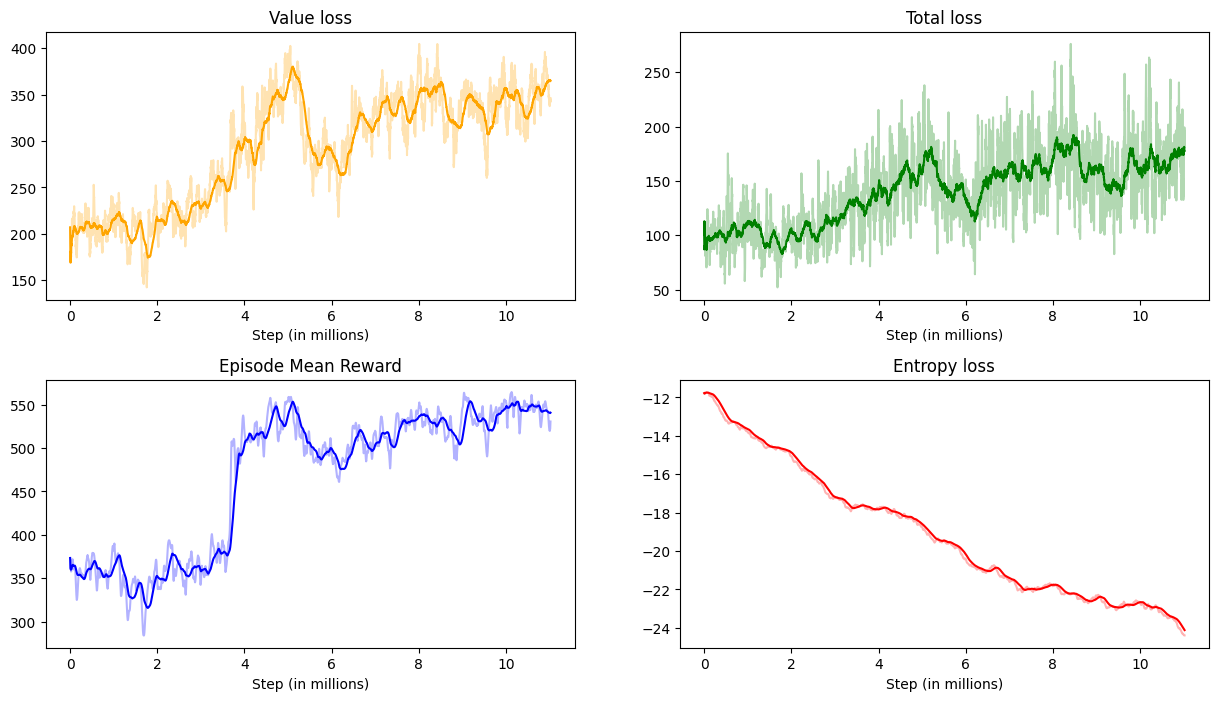

In [125]:
def model_progress(progressFilenames, trainFilenames):
  progress_data = pd.DataFrame()
  for file in progressFilenames:
    progress_data = pd.concat([progress_data, pd.read_csv(file)], ignore_index=True)


  log_int = 2048
  # train_data = pd.DataFrame()
  # for file in trainFilenames:
  #   train_data = pd.concat([train_data, pd.read_csv(file)], ignore_index=True)

  #x_progress = np.arange(0, len(progress_data) * 2048/progress_data['rollout/ep_len_mean'].mean(), 2048/progress_data['rollout/ep_len_mean'].mean())
  x_progress = np.arange(0, len(progress_data)*log_int, log_int)/1e6

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

  sns.lineplot(x=x_progress, y=progress_data['train/value_loss'].rolling(100, min_periods=1).mean(), color="orange", ax=axes[0, 0])
  sns.lineplot(x=x_progress, y=progress_data['train/value_loss'].rolling(10, min_periods=1).mean(), color="orange", alpha=0.3, ax=axes[0, 0])
  axes[0, 0].set_title('Value loss')
  axes[0, 0].set_xlabel('Step (in millions)')
  axes[0, 0].set_ylabel('')

  sns.lineplot(x=x_progress, y=progress_data['train/loss'].rolling(100, min_periods=1).mean(), color="green", ax=axes[0, 1])
  sns.lineplot(x=x_progress, y=progress_data['train/loss'].rolling(10, min_periods=1).mean(), color="green", alpha=0.3, ax=axes[0, 1])
  axes[0, 1].set_title('Total loss')
  axes[0, 1].set_xlabel('Step (in millions)')
  axes[0, 1].set_ylabel('')

  sns.lineplot(x=x_progress, y=progress_data['rollout/ep_rew_mean'].rolling(100, min_periods=1).mean(), color="blue", ax=axes[1, 0])
  sns.lineplot(x=x_progress, y=progress_data['rollout/ep_rew_mean'].rolling(10, min_periods=1).mean(), color="blue", alpha=0.3, ax=axes[1, 0])
  axes[1, 0].set_title('Episode Mean Reward')
  axes[1, 0].set_xlabel('Step (in millions)')
  axes[1, 0].set_ylabel('')

  sns.lineplot(x=x_progress, y=progress_data['train/entropy_loss'].rolling(100, min_periods=1).mean(), color="red", ax=axes[1, 1])
  sns.lineplot(x=x_progress, y=progress_data['train/entropy_loss'].rolling(10, min_periods=1).mean(), color="red", alpha=0.3, ax=axes[1, 1])
  axes[1, 1].set_title('Entropy loss')
  axes[1, 1].set_xlabel('Step (in millions)')
  axes[1, 1].set_ylabel('')


  plt.subplots_adjust(hspace=0.3)

  plt.show()

progressFilenames = ['model1_progress2.csv']
trainFilenames = ['model1_train2.csv']
model_progress(progressFilenames, trainFilenames)

# progress = pd.read_csv('model1_progress2.csv')

# train1 = pd.read_csv('model1_train1.csv', header=1)
# train2 = pd.read_csv('model1_train2.csv', header=1)
# train = pd.concat([train1, train2], ignore_index=True)


# episodes = train2.shape[0]
# x = np.arange(0, episodes)
# y = []

# mean100 = train2['r'].rolling(100, min_periods=1).mean()

# plt.figure(figsize=(10,5))
# plt.plot(x, mean100, linewidth=1)
# plt.xlabel('Episode Number')
# plt.ylabel('Average reward of last 100 episodes')
# plt.show()

In [68]:
progress1 = pd.read_csv('model1_progress1.csv')
progress2 = pd.read_csv('model1_progress2.csv')

progress2['time/total_timesteps'].value_counts()[1001472]

#progress1['time/total_timesteps'].sum()/300 + progress2['time/total_timesteps'].sum()/300

11

In [88]:
empty = pd.DataFrame()
train1 = pd.read_csv('model1_train1.csv', header=1)
train2 = pd.read_csv('model1_train2.csv', header=1)
train = pd.concat([empty, train2], ignore_index=True)
train = pd.concat([train, train1], ignore_index=True)

train

,r,l,t
0,358.626581,300,5.439426
1,365.718523,300,6.272923
2,371.684874,300,7.119249
3,377.790002,300,7.952475
4,356.940184,300,8.787131
...,...,...,...
44169,497.868936,300,9250.333110
44170,523.583906,300,9251.438377
44171,540.132069,300,9252.557270
44172,559.130625,300,9253.545811


In [72]:
count = (progress2['time/total_timesteps'] == 1001472).sum()
count*1001472/300

36720.64

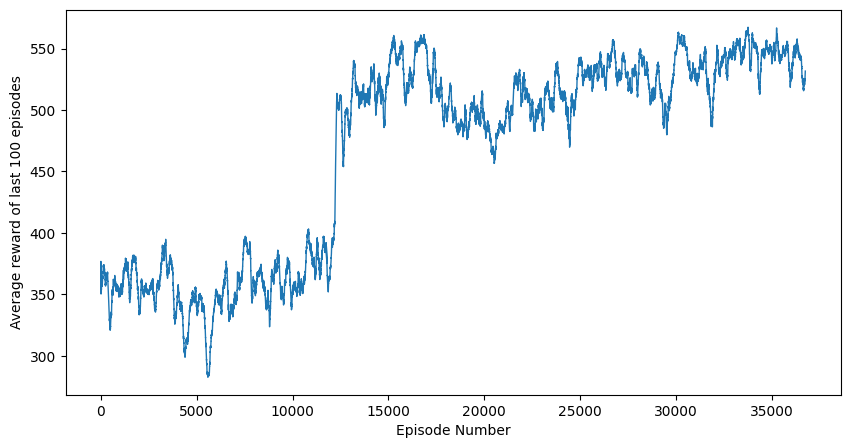

In [112]:
train1 = pd.read_csv('model1_train1.csv', header=1)
train2 = pd.read_csv('model1_train2.csv', header=1)
train = pd.concat([train1, train2], ignore_index=True)


episodes = train2.shape[0]
x = np.arange(0, episodes)
y = []

mean100 = train2['r'].rolling(100, min_periods=1).mean()

plt.figure(figsize=(10,5))
plt.plot(x, mean100, linewidth=1)
plt.xlabel('Episode Number')
plt.ylabel('Average reward of last 100 episodes')
plt.show()

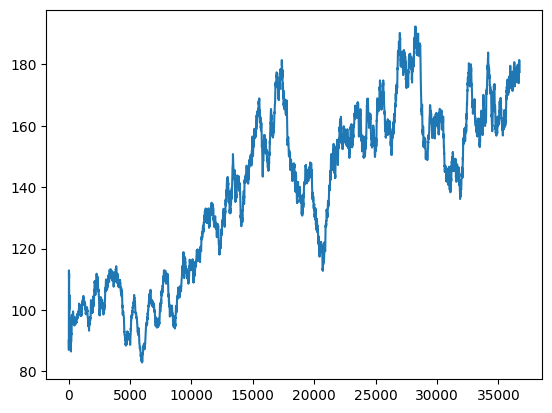

In [84]:
x_progress = np.arange(0, 36741, 6.826666666)

mean100 = progress2['train/loss'].rolling(100, min_periods=1).mean()

plt.plot(x_progress, mean100)